In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("insurance_data.csv")
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [4]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [5]:
df.duplicated().sum()   # No duplicate

np.int64(0)

In [6]:
# let's handle duplicate and null value
df['children']=df['children'].fillna(df['children'].mode()[0])
for x in df.columns:
  if df[x].dtype=='object':
    df[x].fillna(df[x].mode()[0],inplace=True)
  else:
    df[x].fillna(df[x].mean(),inplace=True)
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


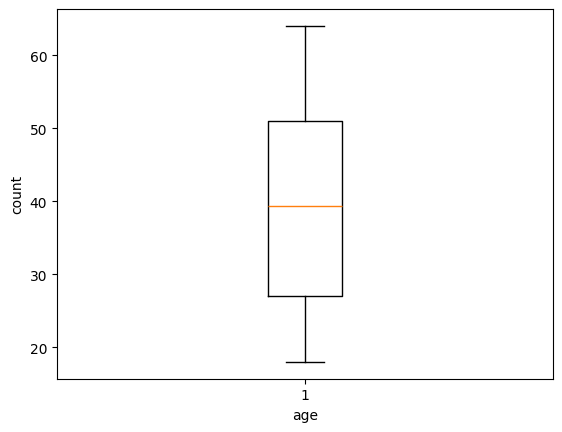

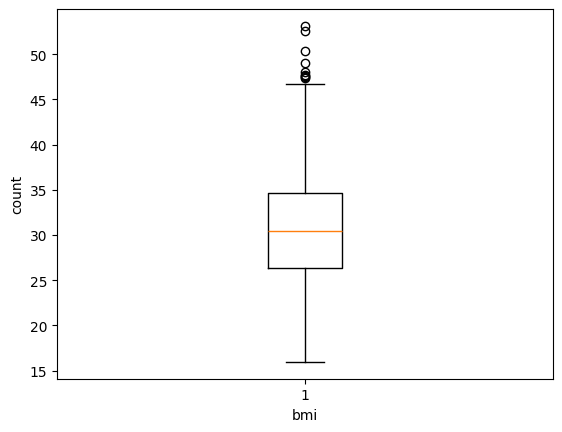

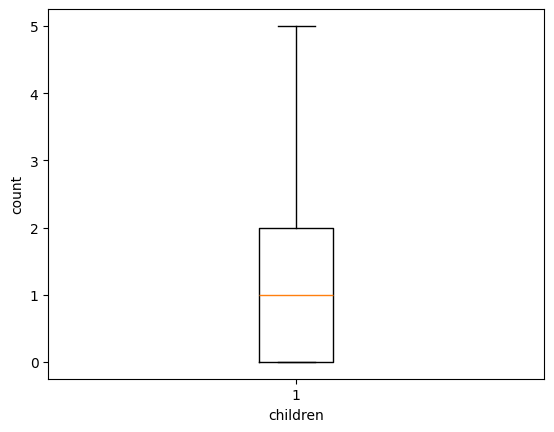

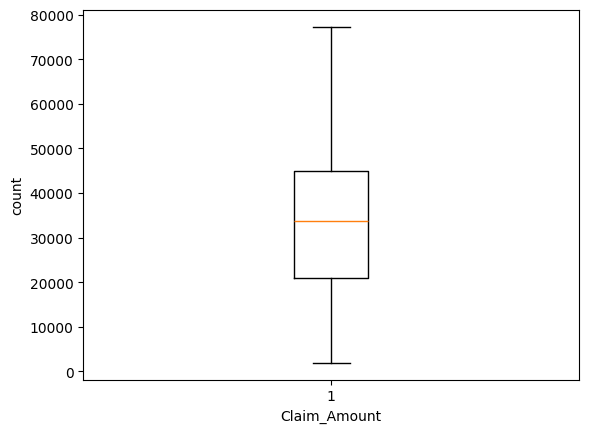

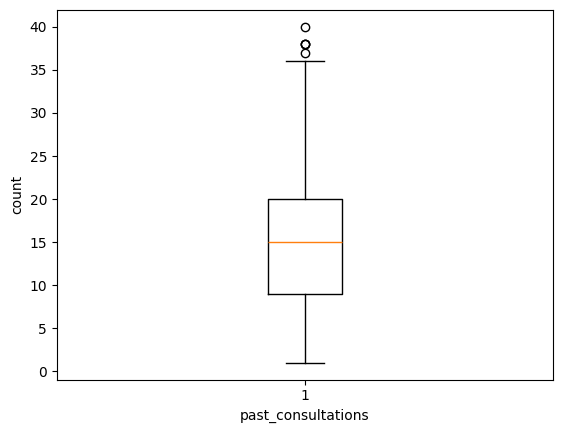

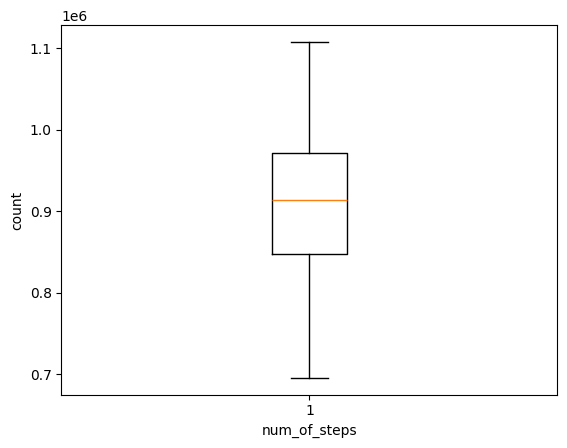

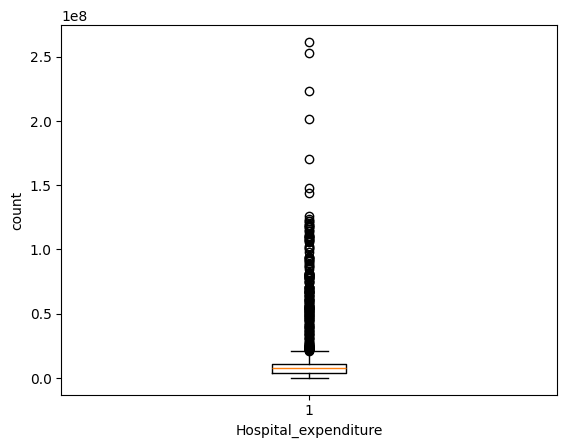

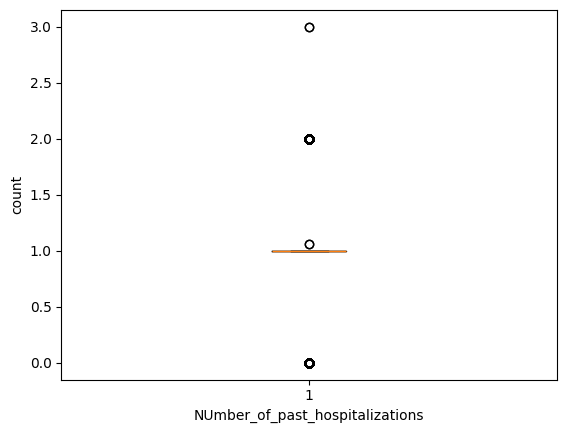

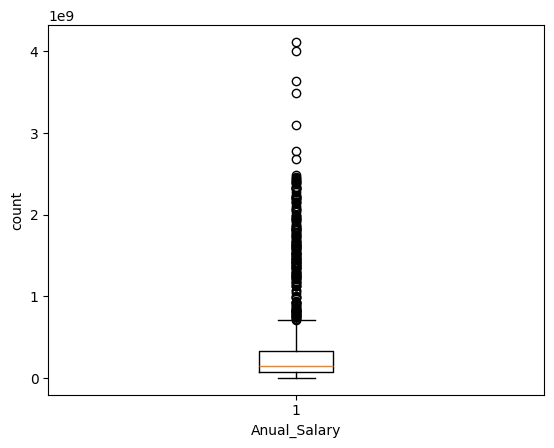

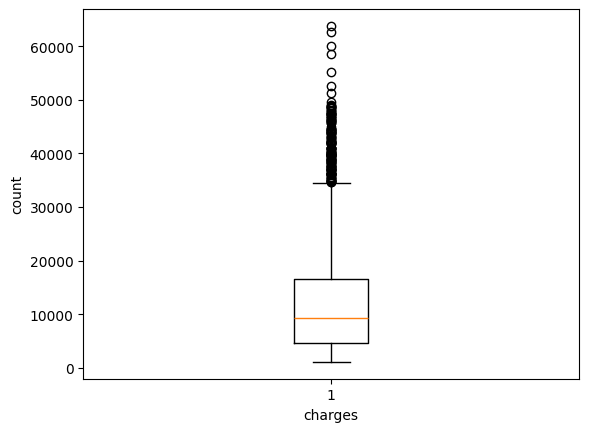

In [7]:
# Finding Outliers in each column by box plot
for x in df.columns:
  if df[x].dtype !='object':
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()

In [8]:
for x in df.columns:
    if df[x].dtype == 'float64':
        q1 = df[x].quantile(0.25)
        q3 = df[x].quantile(0.75)
        IQR = q3 - q1
        lower_limit = q1 - 1.5 * IQR
        upper_limit = q3 + 1.5 * IQR
        df= df[(df[x] >= lower_limit) & (df[x] <= upper_limit)] # Give boolean value true if that number satisfies that  condition


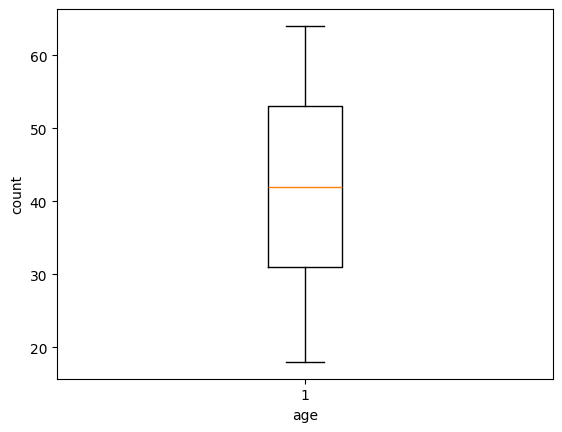

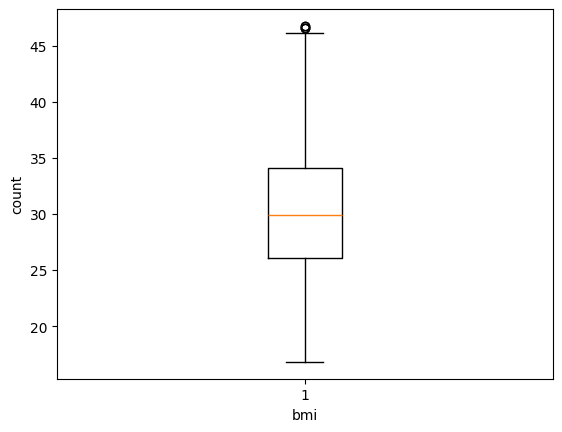

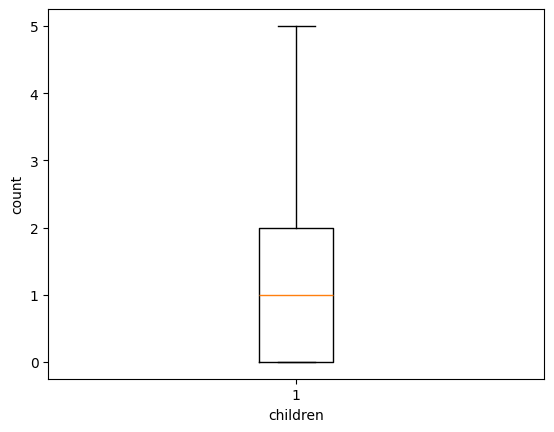

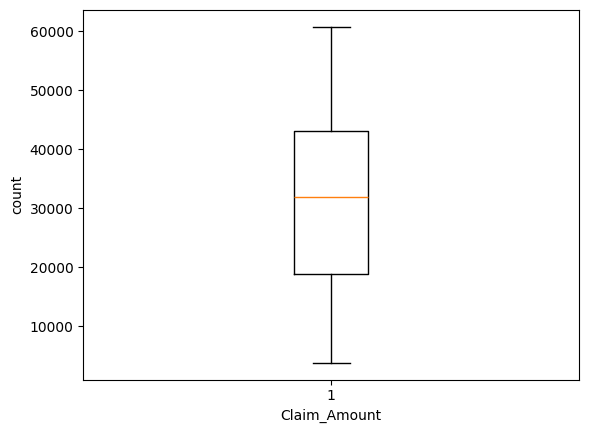

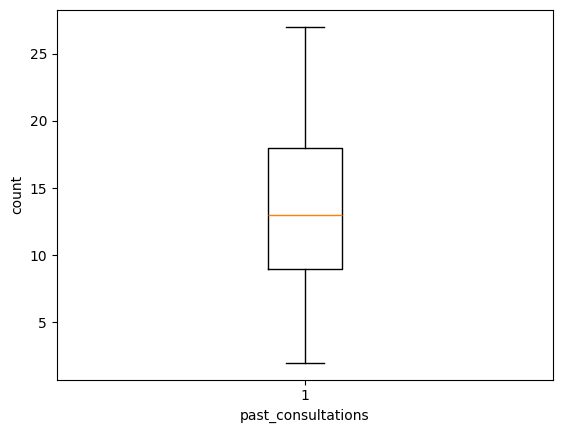

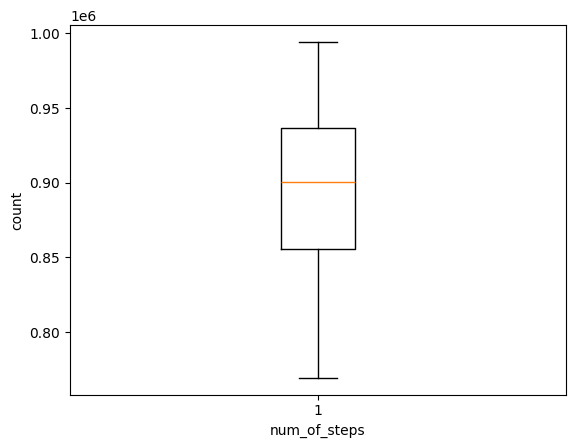

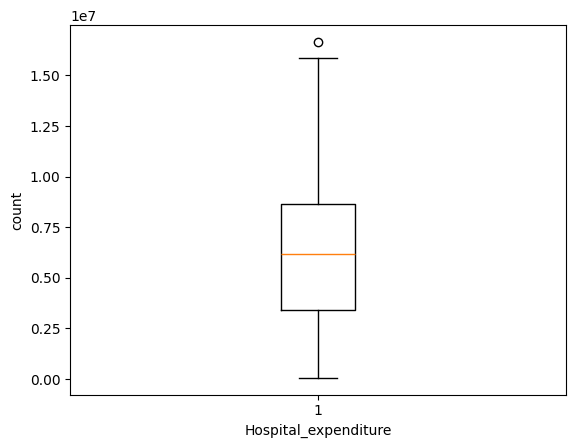

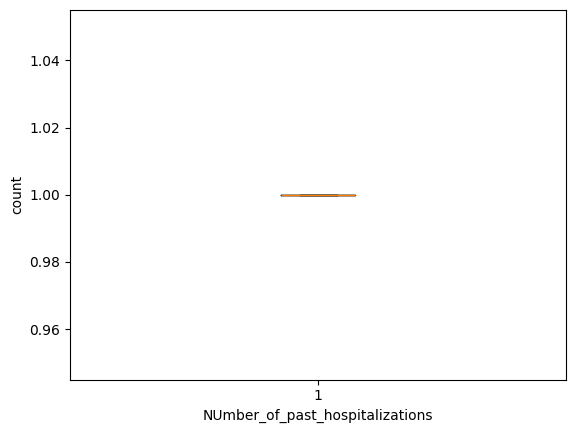

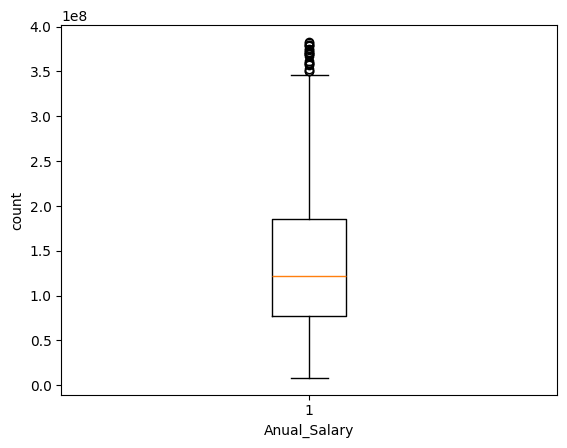

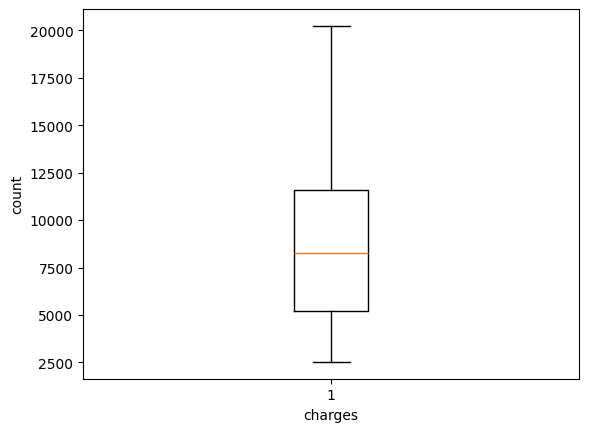

In [9]:
for x in df.columns:
  if df[x].dtype !='object':
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()


In [10]:
df.shape

(881, 13)

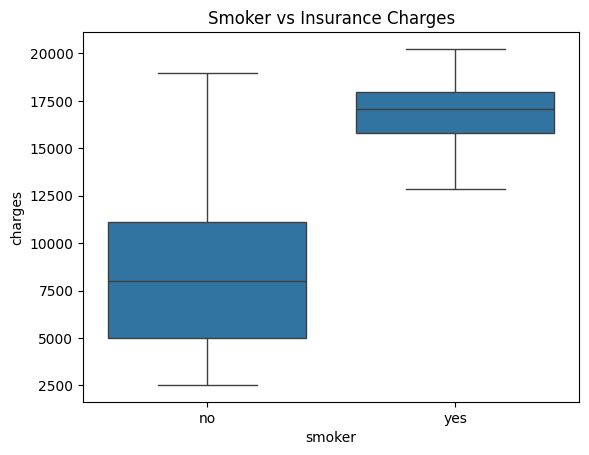

In [ ]:
# Visualization
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Insurance Charges')
plt.show()


In [12]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Label Encoding for categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])          # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])    # yes=1, no=0
df['region'] = le.fit_transform(df['region'])    # assigns integer to each region

# features and target
X = df[['age', 'bmi', 'sex', 'smoker', 'region', 'Anual_Salary']]
y = df['charges']  # target that we want as output

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# chosing model and training model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions of test dataset
y_pred = model.predict(X_test)

# Evaluating model
r2 = r2_score(y_test, y_pred)   # predicted value aur test ka comparison ka calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')

# Save results to Excel (actual vs predicted) comparison data
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_excel('insurance_predictions_linear.xlsx', index=False)



R² Score: 0.9176
RMSE: 1194.16


# Testing

In [13]:
# Testing Linear Regression prediction with different salary values
for salary in [1000, 10000, 30000, 60000, 1000000, 150000]:
    sample_input = [[35, 27.3, 1, 1, 2, salary]]
    pred = model.predict(sample_input)
    print(f"Salary: {salary} & Predicted Charges: {pred[0]:.2f}")


Salary: 1000 & Predicted Charges: 7746.82
Salary: 10000 & Predicted Charges: 7747.10
Salary: 30000 & Predicted Charges: 7747.74
Salary: 60000 & Predicted Charges: 7748.68
Salary: 1000000 & Predicted Charges: 7778.36
Salary: 150000 & Predicted Charges: 7751.52


In [14]:
# Testing model by smoker value
for smoker in [0, 1]:
    sample_input = [[35, 27.3, 1, smoker, 2, 60000]]
    pred = model.predict(sample_input)
    print(f"Smoker: {smoker} => Predicted Charges: {pred[0]:.2f}")


Smoker: 0 => Predicted Charges: 3076.76
Smoker: 1 => Predicted Charges: 7748.68


In [15]:
# Testing by age
for age in [18, 30, 45, 60]:
    sample_input = [[age, 27.3, 1, 1, 2, 60000]]
    pred = model.predict(sample_input)
    print(f"Age: {age} & Predicted Charges: {pred[0]:.2f}")


Age: 18 & Predicted Charges: 5766.72
Age: 30 & Predicted Charges: 7165.75
Age: 45 & Predicted Charges: 8914.54
Age: 60 & Predicted Charges: 10663.34


Finding weight of each features

In [16]:
# coefficients to see weightage of each feature
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coeff_df)

        Feature  Coefficient
0           age   116.586094
1           bmi     5.147841
2           sex  -169.561150
3        smoker  4671.920071
4        region   -96.365989
5  Anual_Salary     0.000032


# **Visualization**

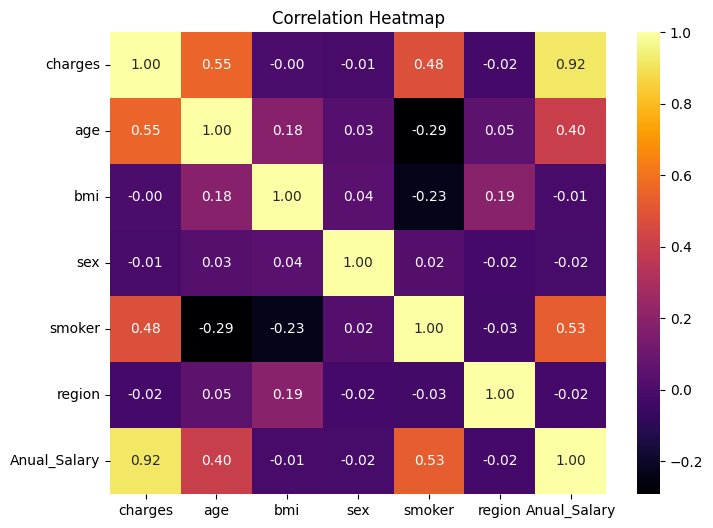

In [17]:
cols = ['charges', 'age', 'bmi', 'sex', 'smoker', 'region', 'Anual_Salary']

corr_matrix = df[cols].corr()
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


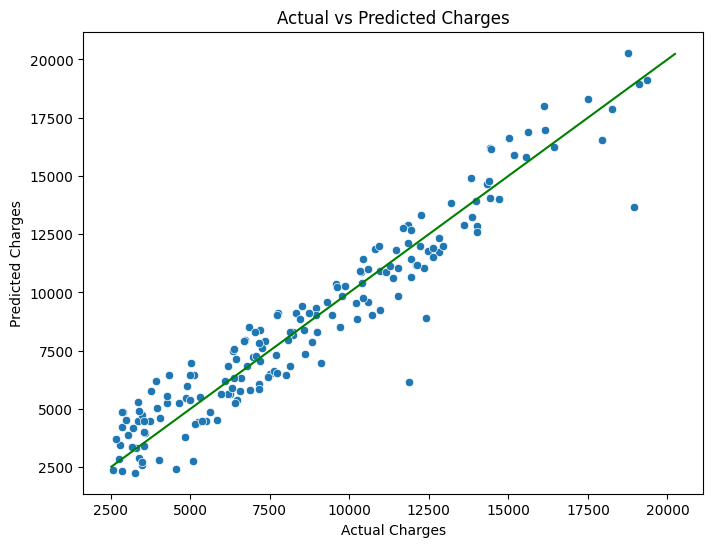

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '-g')  # Ideal line, -g for color only
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')                                # Points above the line represent Overestimation (model predicted higher than actual)
                                                               # Points below the line represent Underestimation (model predicted lower than actual)
plt.title('Actual vs Predicted Charges')
plt.show()
                                                               # y.min(), y.max(): x-coordinates of the line
                                                               # y.min(), y.max():  y cordinate

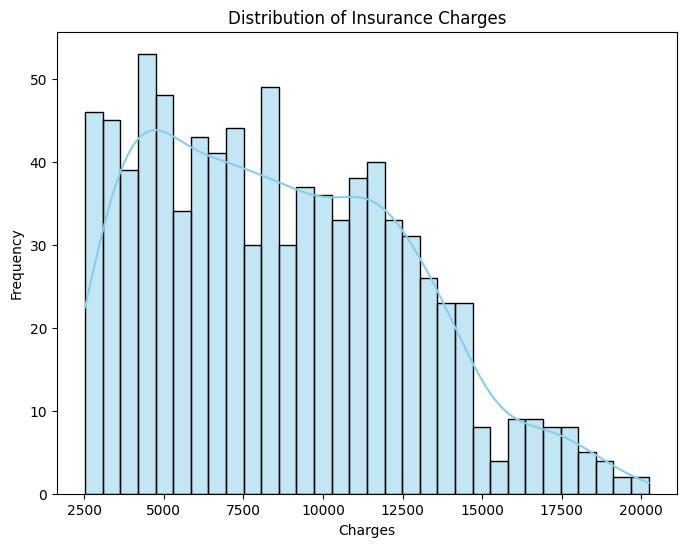

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, bins=32, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


# **Random Forest code**

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Training a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)   # n-esti represent numbner of trees in forset
rf_model.fit(X_train, y_train)              # Training the model

# Predictions
rf_preds = rf_model.predict(X_test)

# Evaluation
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f'Random Forest R² Score: {rf_r2:.4f}')
print(f'Random Forest RMSE: {rf_rmse:.2f}')

Random Forest R² Score: 0.9679
Random Forest RMSE: 745.52


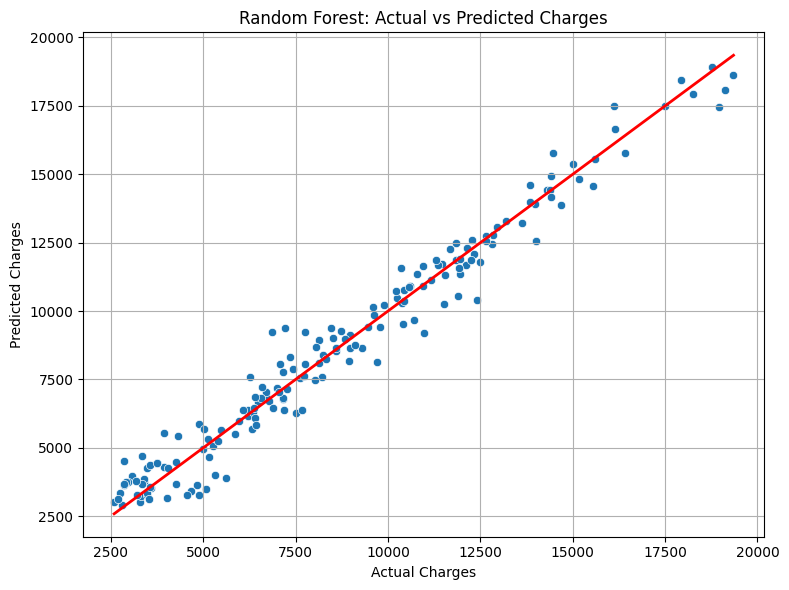

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=rf_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest: Actual vs Predicted Charges')
plt.grid(True)
plt.tight_layout()
plt.show()


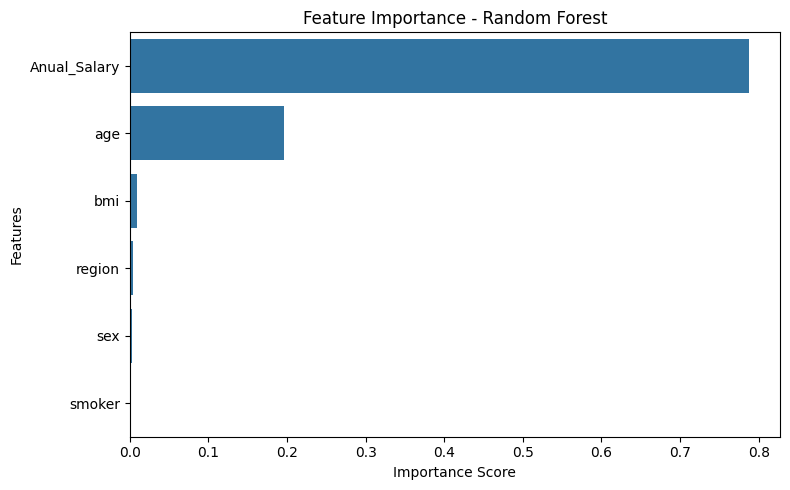

In [22]:
# Feature weightage
importances = rf_model.feature_importances_
features = X.columns
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


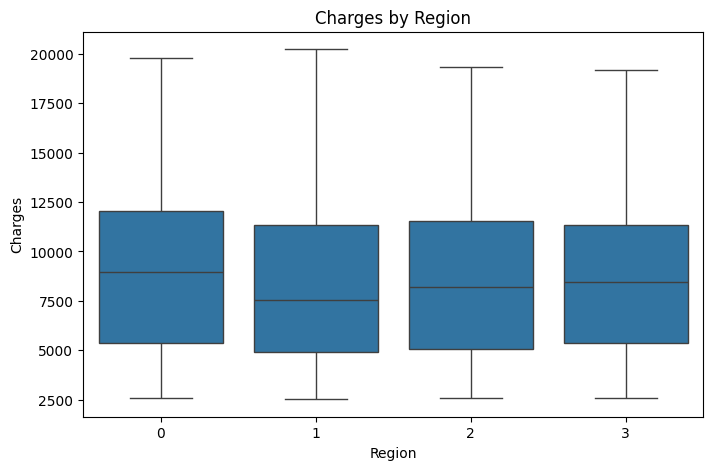

{'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()
# it show which number represent region
print(dict(zip(le.classes_, le.transform(le.classes_))))


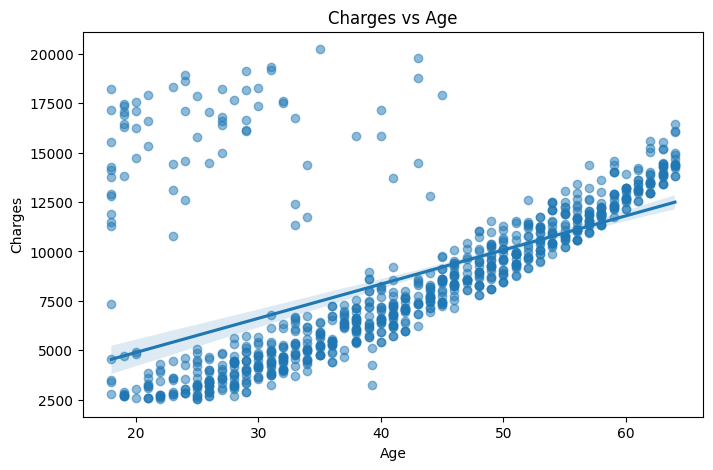

In [33]:
plt.figure(figsize=(8,5))
sns.regplot(x='age', y='charges', data=df, scatter_kws={'alpha':0.5})      # alpha for point opacity of point
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


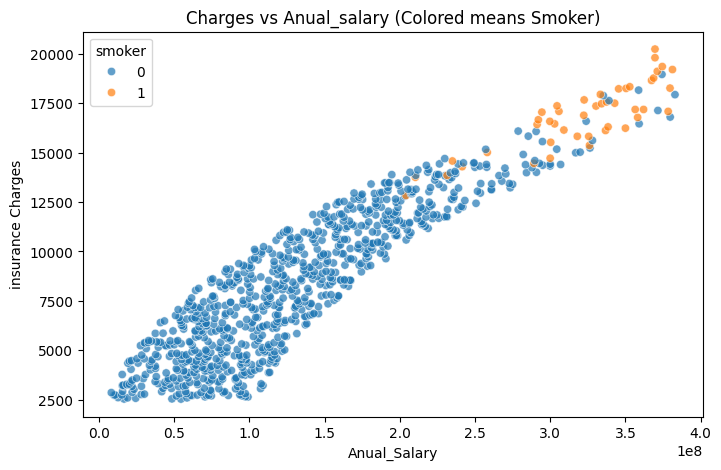

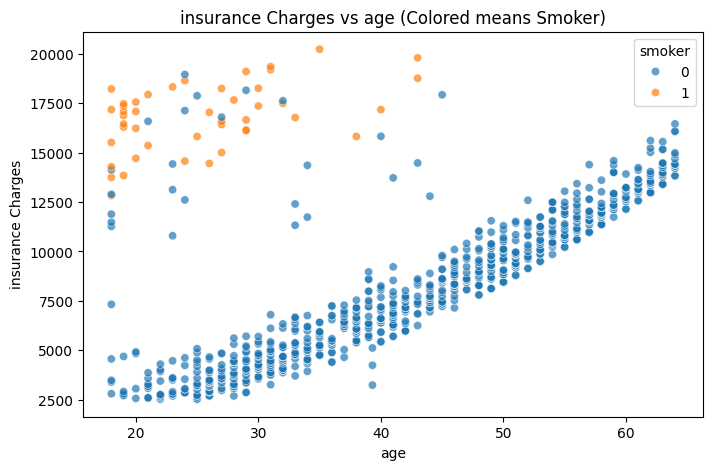

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Anual_Salary', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('Charges vs Anual_salary (Colored means Smoker)')
plt.xlabel('Anual_Salary')
plt.ylabel('insurance Charges')
plt.show()

print()

plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('insurance Charges vs age (Colored means Smoker)')
plt.xlabel('age')
plt.ylabel('insurance Charges')
plt.show()

Testing model by other dataset

In [41]:
# Sample input for testing
sample_input = [[35, 27.3, 1, 1, 2, 89000000]]  # [age, bmi, sex, smoker, region, salary]

# Prediction
predicted_charge = rf_model.predict(sample_input)

print(f"Predicted Insurance Charges: {predicted_charge[0]:.2f}")


Predicted Insurance Charge: 5162.69


# Comparison of both prediction linear and Random Forest

In [46]:
# This is Random forest model(non linear)
for sal in [1000, 10000, 9000000, 6000000000, 100000000, 150000000]:
    sample = [[35, 27.3, 1, 1, 2, sal]]
    pred = rf_model.predict(sample)
    print(f"Salary: {sal} => Predicted Charges: {pred[0]:.2f}")
print()

# This is liner model
for salary in [1000, 10000, 9000000, 6000000000, 100000000, 150000000]:
    sample_input = [[35, 27.3, 1, 1, 2, salary]]
    pred = model.predict(sample_input)
    print(f"Salary: {salary} & Predicted Charges: {pred[0]:.2f}")

Salary: 1000 => Predicted Charges: 4775.05
Salary: 10000 => Predicted Charges: 4775.05
Salary: 9000000 => Predicted Charges: 4775.05
Salary: 6000000000 => Predicted Charges: 19415.48
Salary: 100000000 => Predicted Charges: 5179.58
Salary: 150000000 => Predicted Charges: 8500.88

Salary: 1000 & Predicted Charges: 7746.82
Salary: 10000 & Predicted Charges: 7747.10
Salary: 9000000 & Predicted Charges: 8030.95
Salary: 6000000000 & Predicted Charges: 197188.34
Salary: 100000000 & Predicted Charges: 10904.15
Salary: 150000000 & Predicted Charges: 12482.83
